# Exploratory data analysis - Part 1

## Setup

In [1]:
# Libraries
# System utils
from pathlib import Path
# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [3]:
# Data import
data_path = Path().resolve().parents[0] / 'data' / 'raw' / 'churn_modelling.csv'
raw_churn_df = pd.read_csv(data_path)

## Data overview

In [4]:
raw_churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
raw_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


### Exploratory data quality check: metadata
 - The dataset consists of 14 columns and 10,002 rows, providing a manageable size for analysis.
 - Some columns have a `dtype` of `int64`, but they represent Boolean values (e.g., `1` for True, `0` for False). These could be converted to `bool` type for better clarity and memory efficiency.
 - The `Exited` column represents a binary label indicating customer churn (1 for churned, 0 for retained), which will be the target variable for the model. 

In [6]:
raw_churn_df.isnull().sum().sort_values(ascending=False)

Geography          1
Age                1
HasCrCard          1
IsActiveMember     1
CustomerId         0
RowNumber          0
Gender             0
CreditScore        0
Surname            0
Tenure             0
NumOfProducts      0
Balance            0
EstimatedSalary    0
Exited             0
dtype: int64

### Exploratory data quality check: null values per columns
 - Some columns contain null values, but the number of affected rows is minimal.
 - The columns with missing values are `Geography`, `Age`, `HasCrCard`, and `IsActiveMember`, with at most 4 records missing in each.
 - Since the number of missing values is small, we might consider dropping these rows, as they are unlikely to significantly impact the analysis. Alternatively, imputation could be considered, depending on the context and importance of the features.

In [7]:
raw_churn_df.duplicated(subset=['CustomerId']).sum()

np.int64(2)

### Exploratory data quality check: duplicated records
 - The dataset contains two rows for the same customer, identified by the `CustomerId` column.
 - These duplicated rows should be removed during the data cleaning process to avoid skewing analysis or model training.

In [8]:
raw_churn_df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002,10002.000000,10001,10002,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5001.499600,1.569093e+07,NaN,650.555089,NaN,NaN,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,NaN,96.661615,NaN,NaN,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000


### Exploratory data quality check: data description
 - The `CreditScore` values range from 350 to 850, indicating typical credit score ranges for the dataset.
 - The dataset contains customers from three countries, with approximately half of the customers located in France.
 - There are more male customers than female, though the gender imbalance is not significant.
 - The youngest customer is 18 years old, while the oldest is 92 years old.
 - The oldest customer has been with the company for 10 years, while the most recent customer has been with the company for less than a year.
 - Some columns have `int64` dtype but represent categorical data, which may require conversion for better clarity (e.g., converting to `bool` or `category`).

## Data preparing for visualization

In [9]:
prepared_churn_df = raw_churn_df.copy()
prepared_churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [10]:
prepared_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [11]:
prepared_churn_df[prepared_churn_df.isna().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


There are only 4 records with null values. Since it is a small number, the selected strategy to treat these rows is removing them.

In [12]:
prepared_churn_df.dropna(inplace=True)
prepared_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9998 non-null   int64  
 1   CustomerId       9998 non-null   int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9998 non-null   int64  
 4   Geography        9998 non-null   object 
 5   Gender           9998 non-null   object 
 6   Age              9998 non-null   float64
 7   Tenure           9998 non-null   int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9998 non-null   float64
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9998 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [13]:
prepared_churn_df[['HasCrCard', 'IsActiveMember', 'Exited']] = prepared_churn_df[['HasCrCard', 'IsActiveMember', 'Exited']].astype('bool')
prepared_churn_df[['Geography', 'Gender']] = prepared_churn_df[['Geography', 'Gender']].astype('category')
prepared_churn_df[['Age']] = prepared_churn_df[['Age']].astype('int64')
prepared_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        9998 non-null   int64   
 1   CustomerId       9998 non-null   int64   
 2   Surname          9998 non-null   object  
 3   CreditScore      9998 non-null   int64   
 4   Geography        9998 non-null   category
 5   Gender           9998 non-null   category
 6   Age              9998 non-null   int64   
 7   Tenure           9998 non-null   int64   
 8   Balance          9998 non-null   float64 
 9   NumOfProducts    9998 non-null   int64   
 10  HasCrCard        9998 non-null   bool    
 11  IsActiveMember   9998 non-null   bool    
 12  EstimatedSalary  9998 non-null   float64 
 13  Exited           9998 non-null   bool    
dtypes: bool(3), category(2), float64(2), int64(6), object(1)
memory usage: 830.2+ KB


## Visualization

### Histograms

In [14]:
histogram_features = prepared_churn_df.columns.drop([
    'RowNumber',
    'CustomerId',
    'Surname',
    'Geography',
    'Gender',
    'HasCrCard',
    'NumOfProducts',
    'Tenure',
    'IsActiveMember',
    'Exited'
])
histogram_features

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], dtype='object')

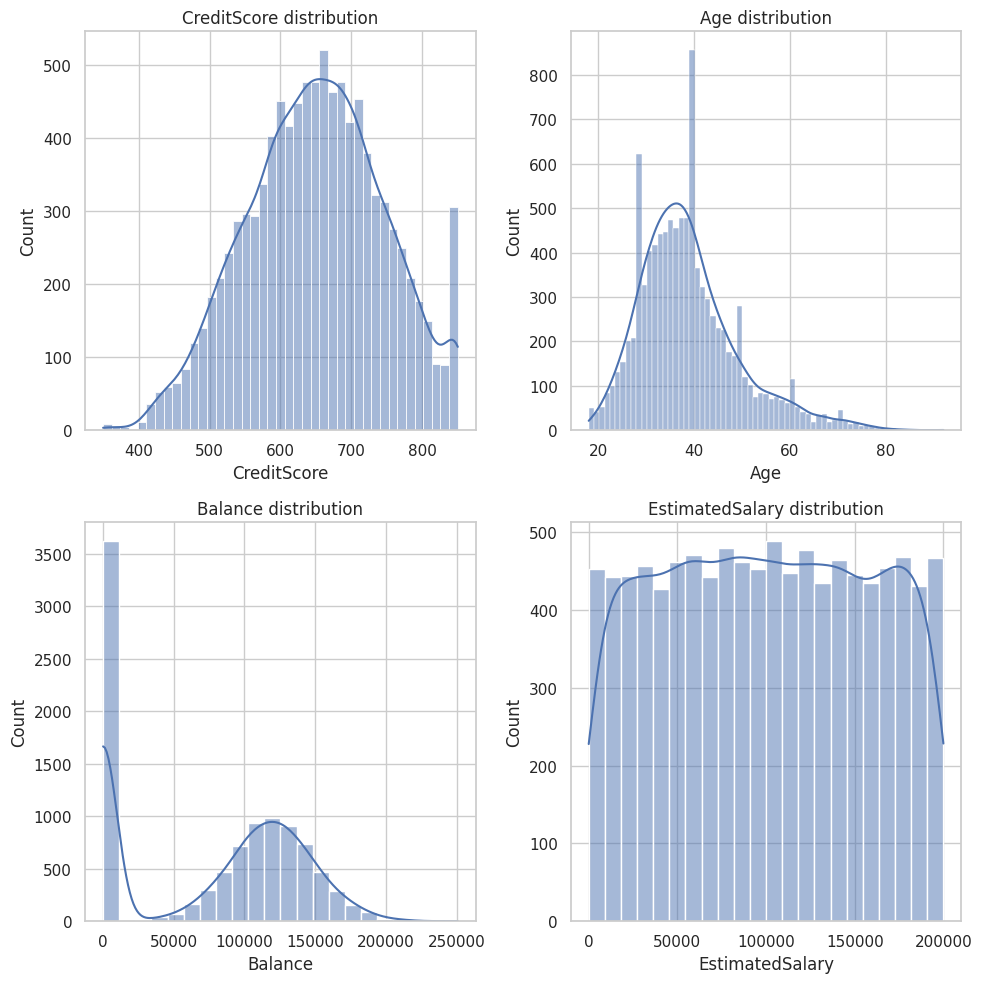

In [15]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(histogram_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(prepared_churn_df[feature], kde=True)
    plt.title(f'{feature} distribution')

plt.tight_layout()
plt.show()

### Exploratory data visualization: graphic interpretation
This set of histograms and KDE (Kernel Density Estimation) plots show the distribution of different features in the dataset.
 - Credit Score Distribution
   - The distribution is approximately normal, with most values between 500 and 750.
   - There are a few customers with very low or very high credit scores.
 - Age Distribution
   - The majority of customers are between 30 and 50 years old, with a peak around 40.
   - There is a longer tail towards older customers, suggesting some skewness.
 - Balance Distribution
   - A significant number of customers have a zero balance, possibly indicating that they don’t actively use their accounts.
   - For non-zero balances, the distribution is right-skewed, with most customers having balances below 150,000.
 - Estimated Salary Distribution
   - Salaries appear uniformly distributed across the dataset, meaning income is evenly spread.

### Count plots

In [16]:
count_plot_features = prepared_churn_df.columns.drop([
    'RowNumber',
    'CustomerId',
    'Surname',
    'Age',
    'CreditScore',
    'EstimatedSalary',
    'Balance'
])
count_plot_features

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

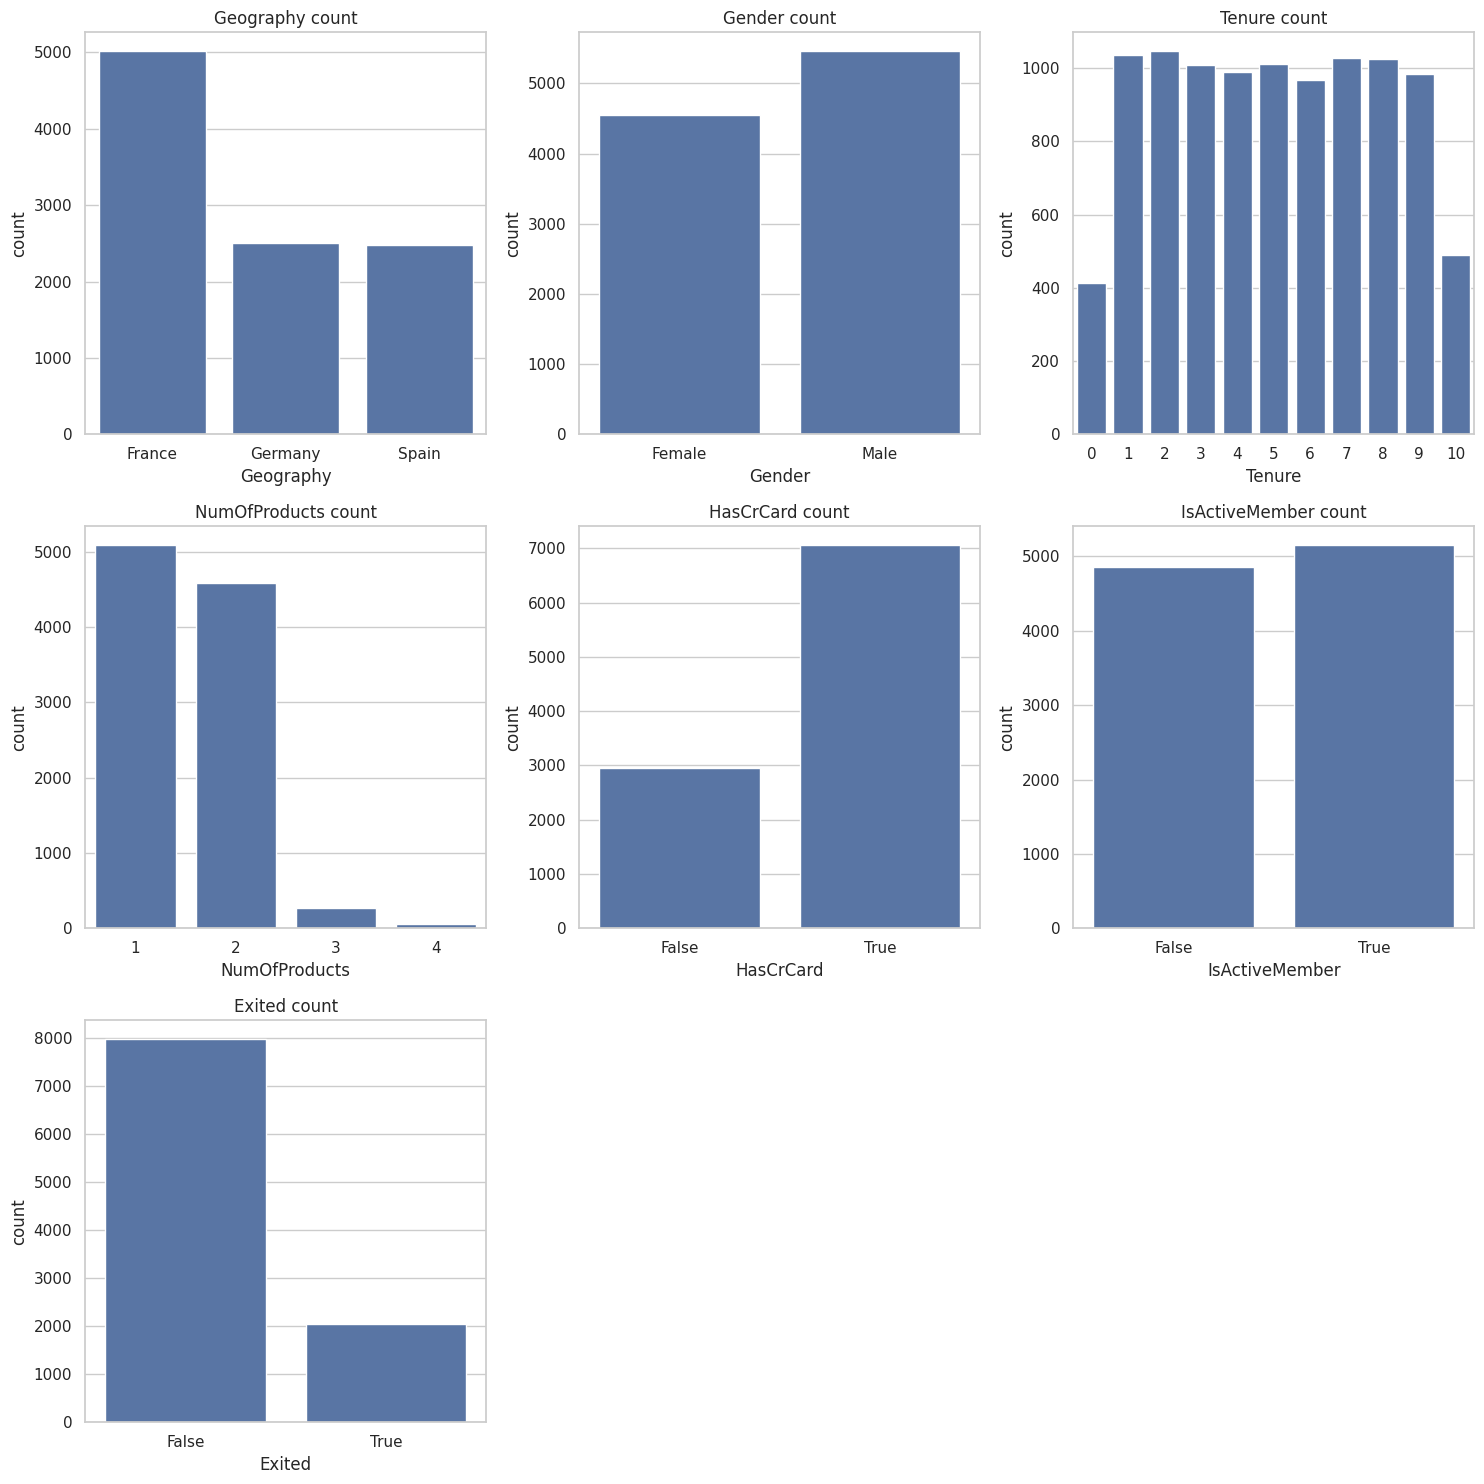

In [17]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(count_plot_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, data=prepared_churn_df)
    plt.title(f'{feature} count')

plt.tight_layout()
plt.show()

### Exploratory data visualization: graphic interpretation
This set of bar plots represents the distribution of various categorical and discrete numerical features in the dataset.
 - Geography Count
   - The majority of customers are from France, with significantly fewer customers from Germany and Spain.
   - This suggests a potential bias towards French customers in the dataset.
 - Gender Count
   - There are slightly more male customers than female customers.
   - The difference is not substantial, indicating a relatively balanced gender representation.
 - Tenure Count
   - The distribution of tenure (length of customer relationship) is fairly uniform across values 1 through 9.
   - There's a slight dip at tenure 0 and a noticeable drop at tenure 10, suggesting fewer customers at the extremes of tenure.
- NumOfProducts Count
   - Most customers have either 1 or 2 products.
   - There are very few customers with 3 or 4 products, indicating a preference for fewer products.
- HasCrCard Count
   - A large majority of customers have a credit card.
   - This suggests that having a credit card might be a common factor among customers.
- IsActiveMember Count
   - The number of active and inactive members is almost evenly split.
   - This indicates a balanced representation of both active and inactive customers.
- Exited Count
   - The vast majority of customers have not exited (churned).
   - There is a significantly smaller number of customers who have exited. This suggests a class imbalance problem, where the 'False' (not exited) class dominates.

## Box plots

In [18]:
box_plot_features = prepared_churn_df.columns.drop([
    'RowNumber',
    'CustomerId',
    'Surname',
    'Geography',
    'IsActiveMember',
    'HasCrCard',
    'Exited',
    'Gender'
])
box_plot_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

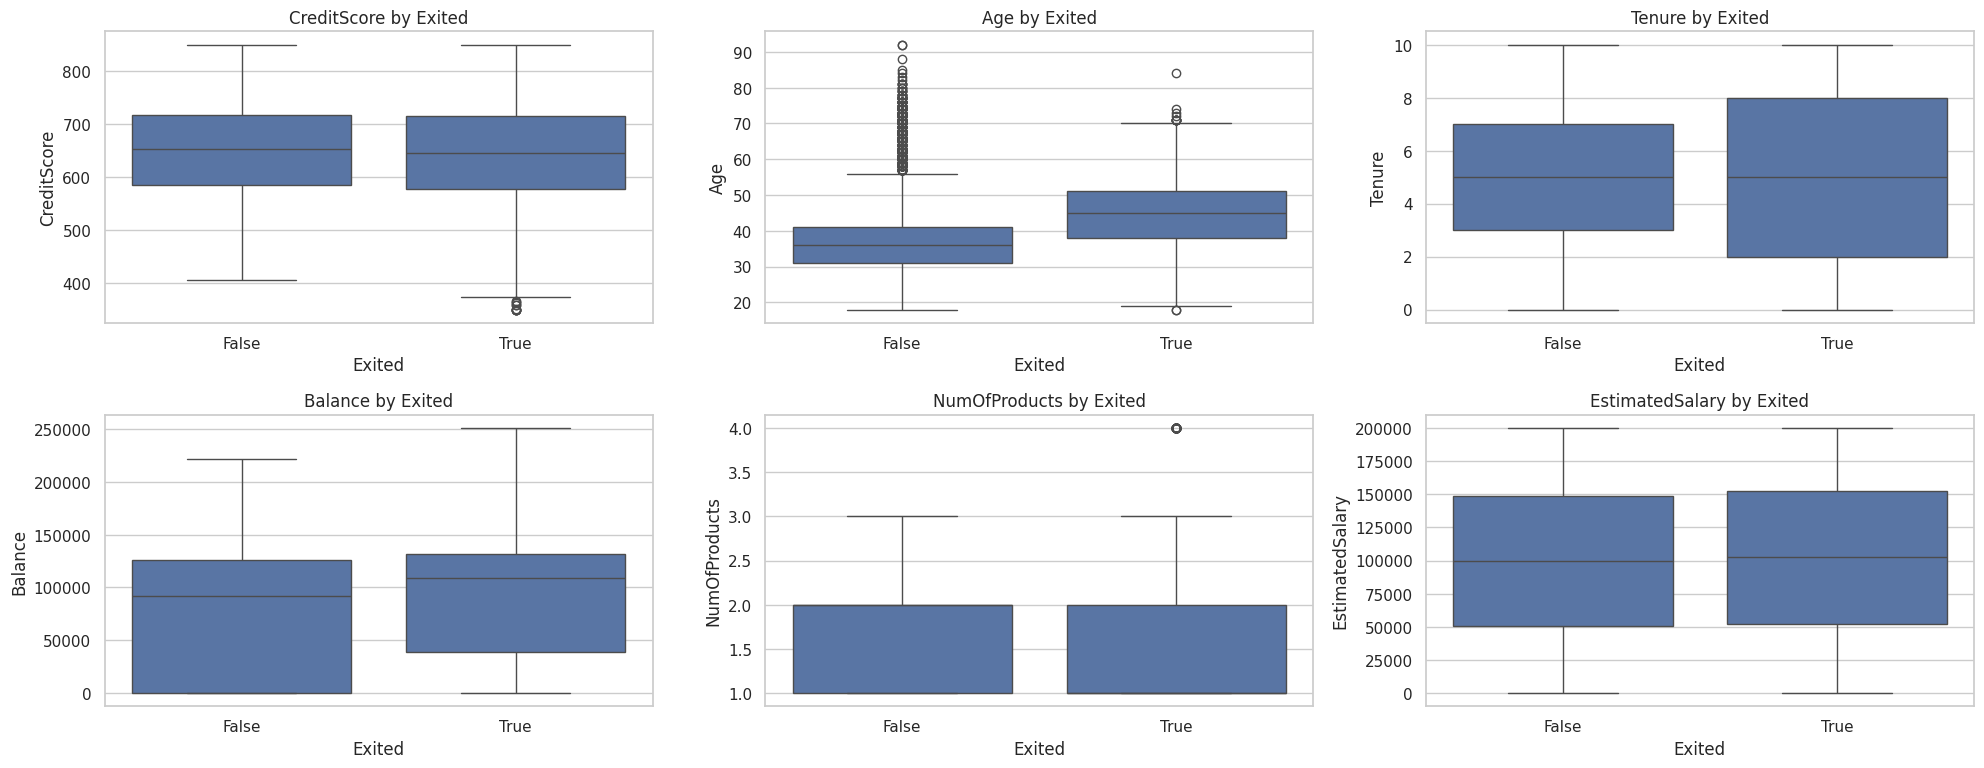

In [19]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(box_plot_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='Exited', y=feature, data=prepared_churn_df)
    plt.title(f'{feature} by Exited')

plt.tight_layout()
plt.show()

### Exploratory data visualization: graphic interpretation
These boxplots compare the distribution of various features between customers who exited (churned) and those who remained.

 - Credit Score by Exited
   - The median credit score is similar for both groups, indicating that credit score alone may not be a strong factor in customer churn.
   - There are some lower outliers among churned customers, but the distribution is fairly consistent.
 - Age by Exited
   - Churned customers tend to be older, with a higher median age.
   - Many older customers have exited, as seen in the upper range of the boxplot.
   - Younger customers are more concentrated in the non-churn group.
 - Tenure by Exited
   - The tenure distribution appears similar between churned and non-churned customers.
   - The spread is wide, meaning customers of all tenure lengths exist in both groups.
 - Balance by Exited
   - Customers with higher balances tend to churn at a slightly higher rate.
   - The presence of customers with zero balance in both groups suggests that this factor alone is not a key churn predictor.
 - Number of Products by Exited
   - Non-churned customers mostly have 1 or 2 products.
   - The presence of an outlier (with 4 products) among churned customers suggests that having too many products may increase churn risk.
 - Estimated Salary by Exited
   - No significant difference in salary distribution is observed between churned and non-churned customers.
   - Salary appears to be uniformly distributed in both groups, meaning it is likely not a strong predictor of churn.

### Correlation heatmap

In [20]:
correlation_heatmap_features = prepared_churn_df.columns.drop([
    'RowNumber', 'CustomerId', 'Surname', 'Geography',
    'IsActiveMember', 'HasCrCard', 'Exited', 'Gender'])
correlation_heatmap_features 

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

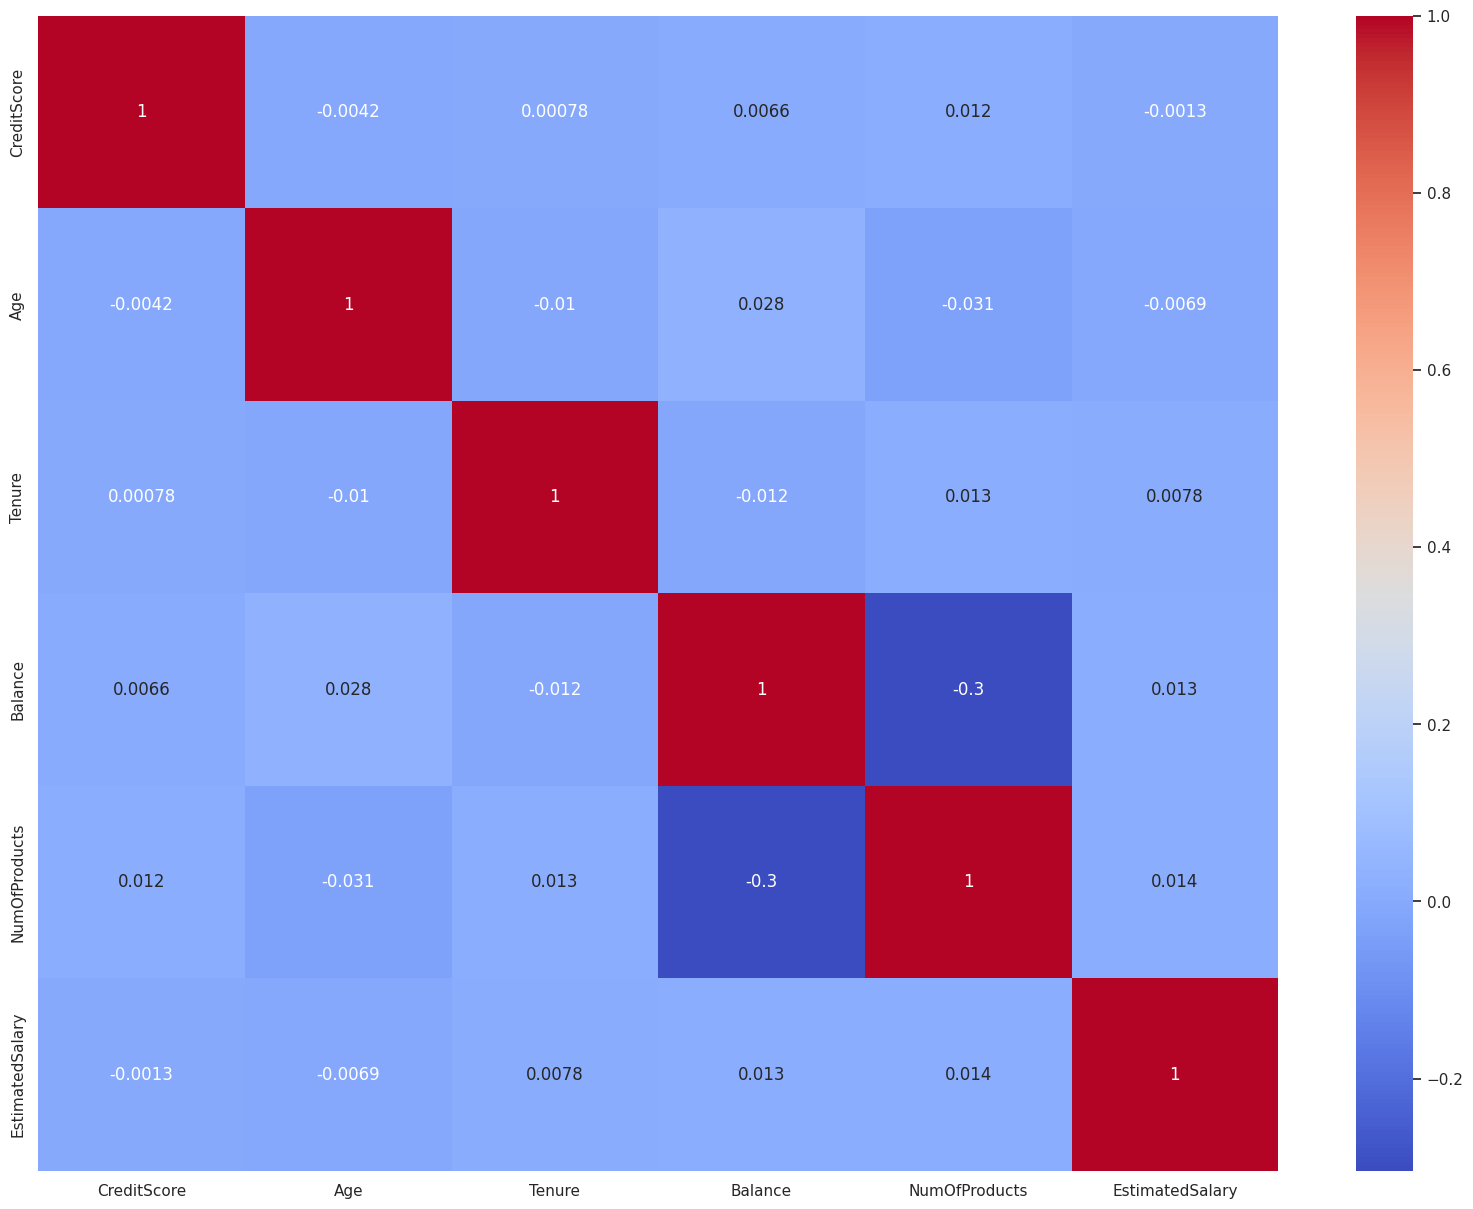

In [21]:
plt.figure(figsize=(20, 15))
correlation_matrix = prepared_churn_df[correlation_heatmap_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Exploratory data visualization: graphic interpretation
 - The strongest negative correlation is between `Balance` and `NumOfProducts` (-0.3), indicating that customers with higher balances tend to have fewer products.
 - Most other variables have very weak correlations with each other, suggesting they are mostly independent.
 - No strong multicollinearity is observed, meaning no immediate need for dimensionality reduction.